In [1]:
#IMporting the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score, balanced_accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

In [2]:
#Print the fist 5 rows
df = pd.read_csv('SAP.csv')
df.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
#Print the column types, check the missing values and data set shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
%matplotlib inline

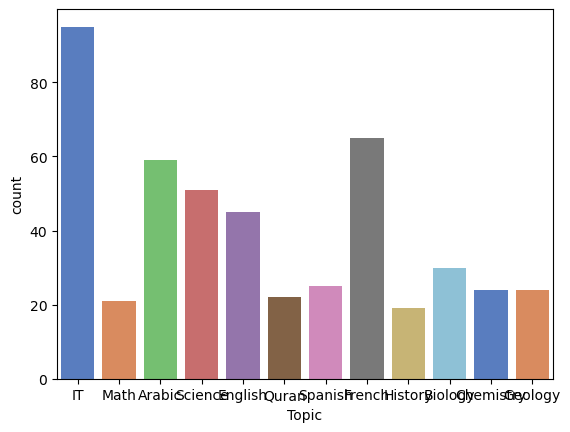

In [5]:
#breakdown by class
sns.countplot(x="Topic", data=df, palette="muted");
plt.show()

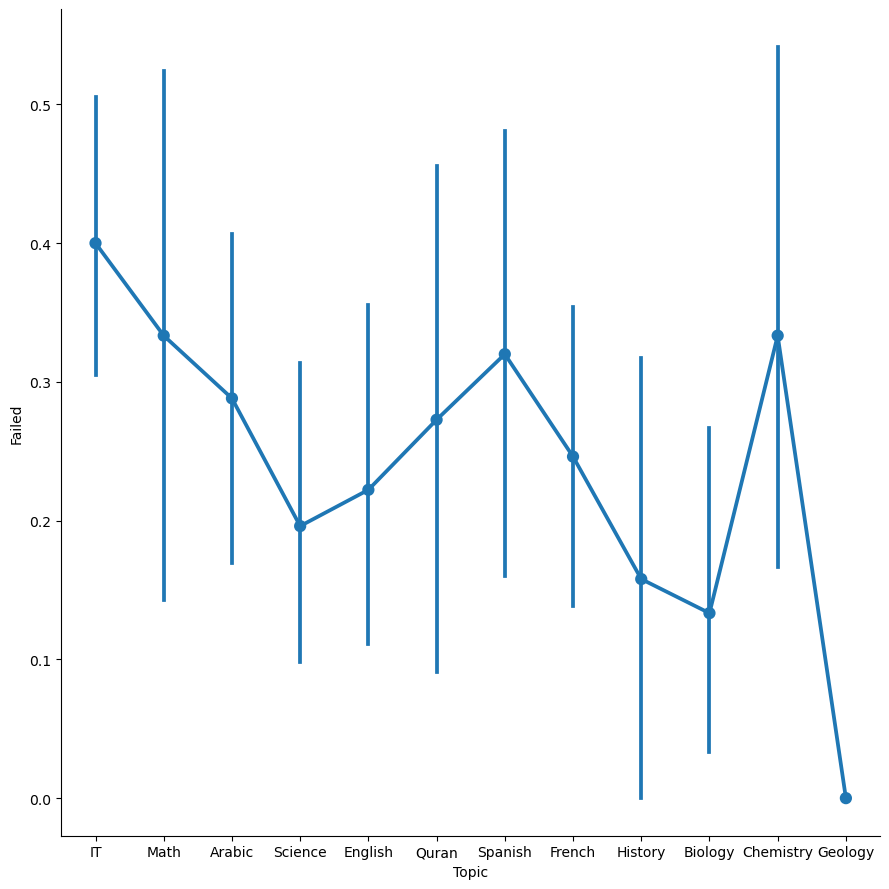

In [6]:
df['Failed'] = np.where(df['Class']=='L',1,0)
sns.factorplot('Topic','Failed',data=df,size=9)

In [7]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


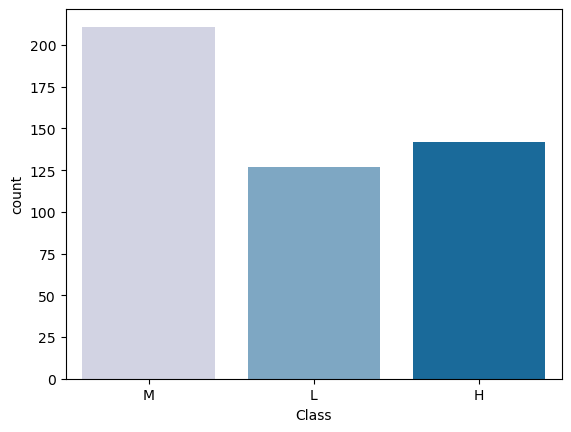

In [8]:
sns.countplot(x='Class',data=df,palette='PuBu')
plt.show()

<AxesSubplot:>

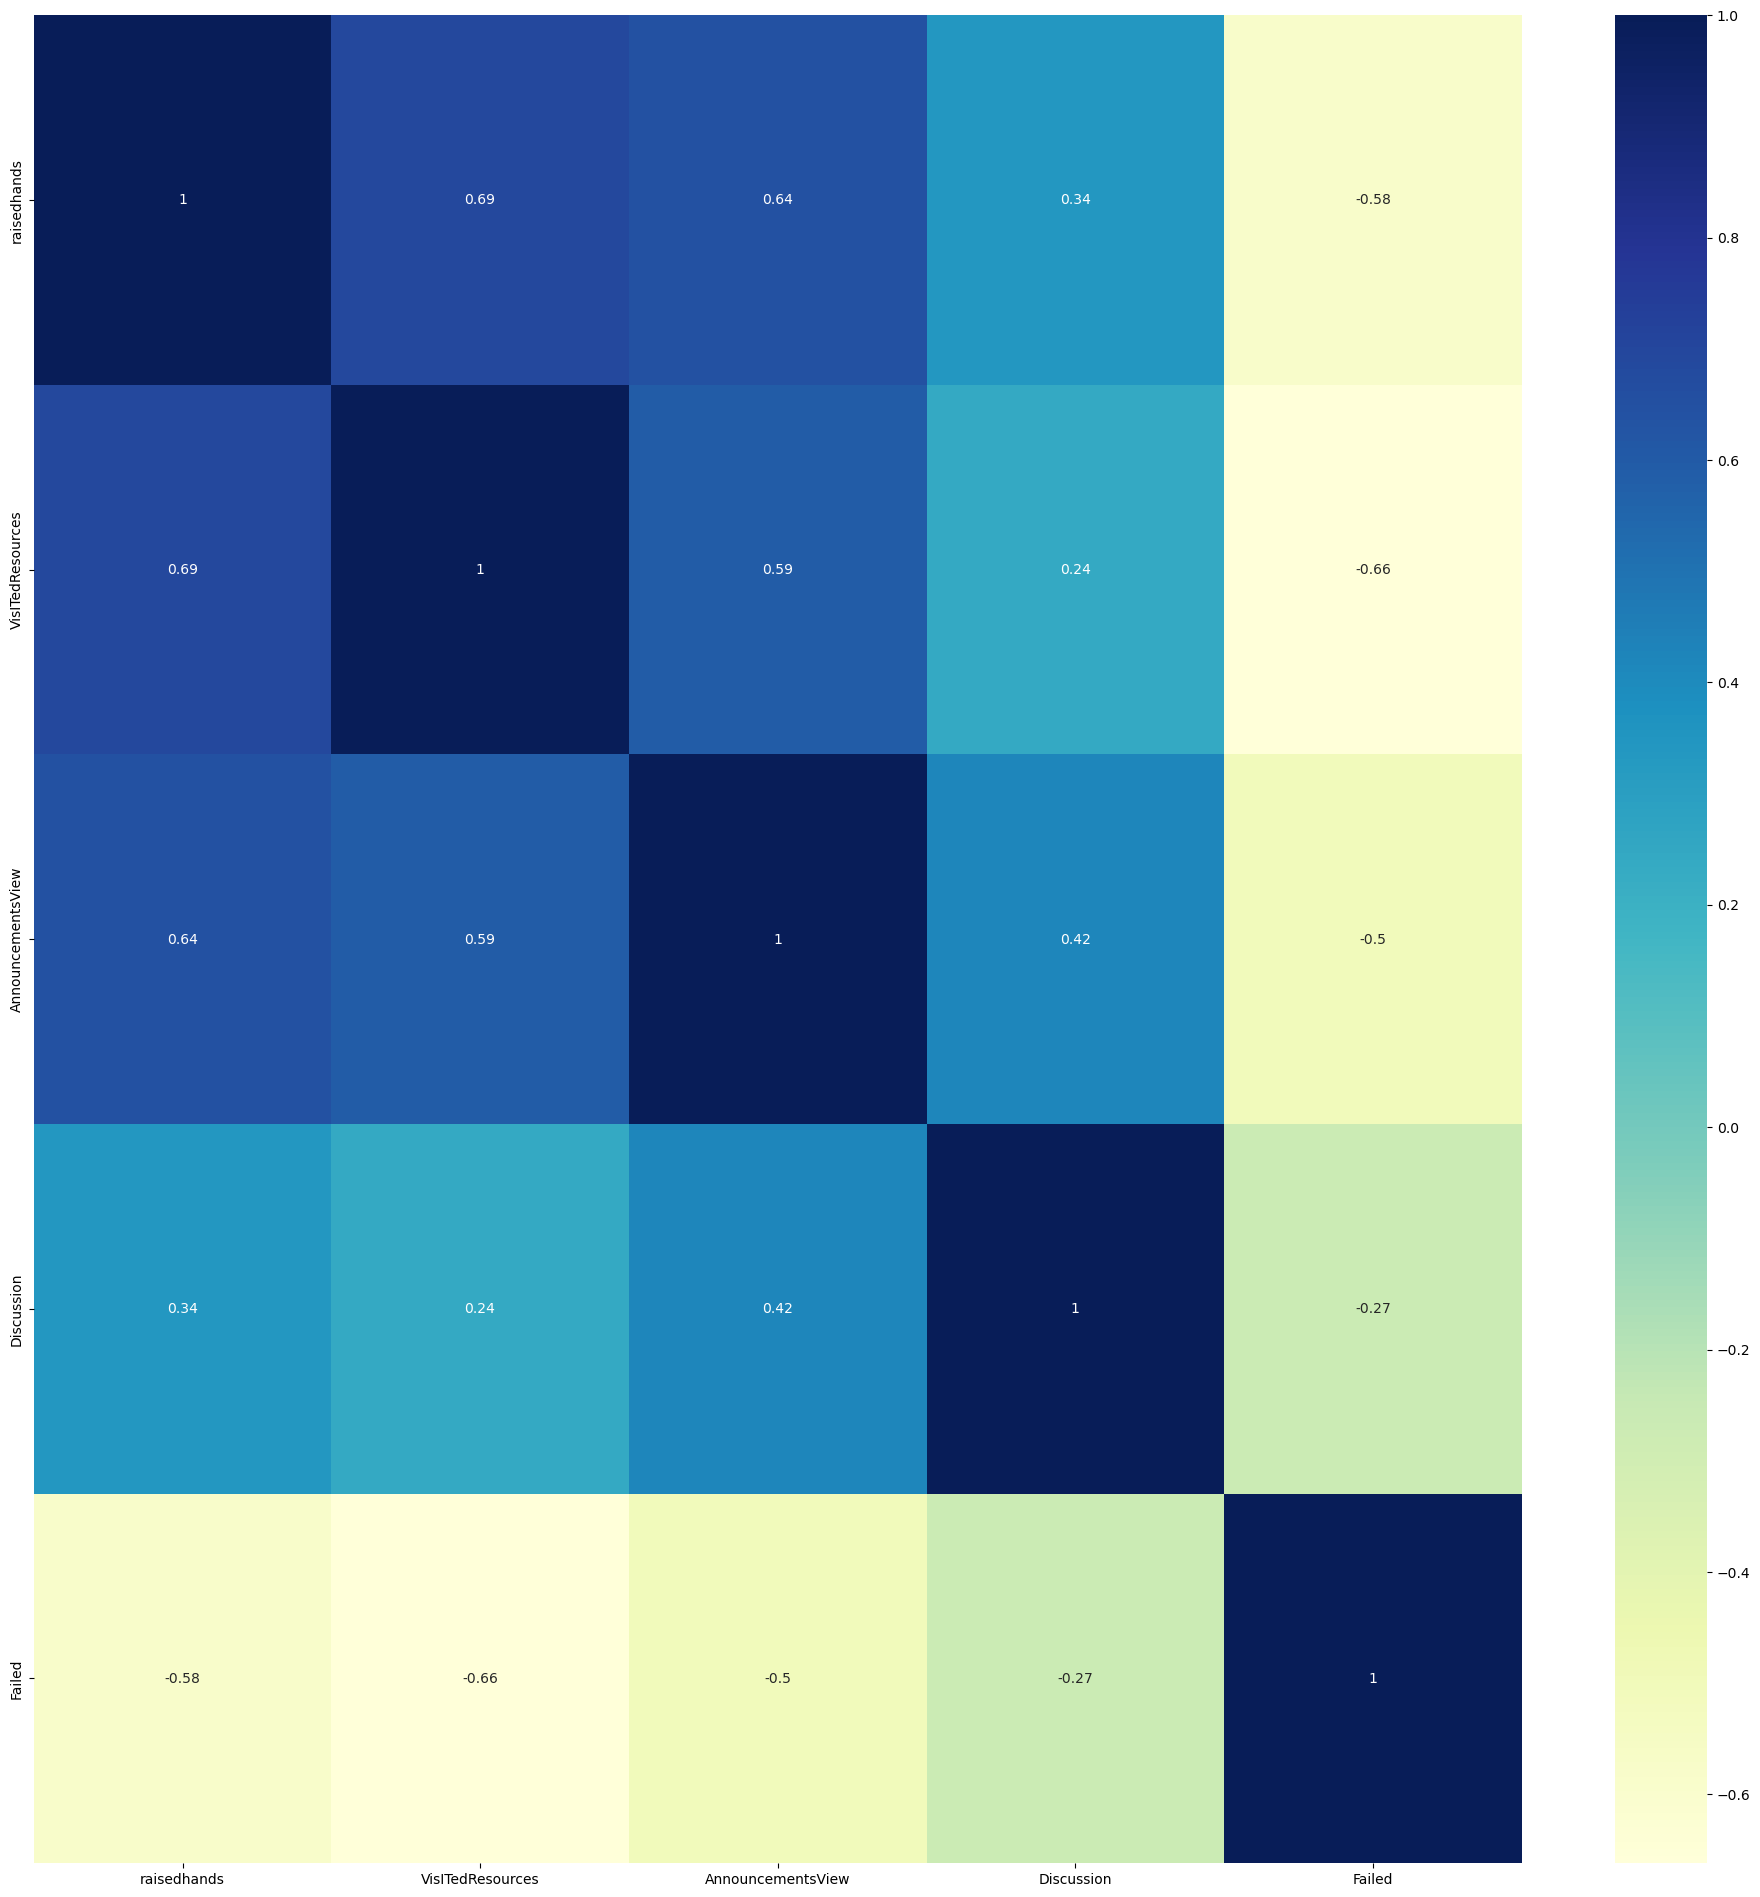

In [9]:
plt.figure(figsize=(24,24))
cors = df.corr()
sns.heatmap(cors,annot=True,cmap='YlGnBu')

In [10]:
df.drop('Failed', axis=1, inplace=True)

In [11]:
X = df.drop('Class', axis =1)
y = df['Class']

In [12]:
y.head()

0    M
1    M
2    L
3    L
4    M
Name: Class, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

# Enocode the Class column
encoder = LabelEncoder()
df['Class_encoded'] = encoder.fit_transform(df['Class'])

# Convert the result to a DataFrame
df_encoded = pd.DataFrame(df['Class_encoded'], columns=['Class'])

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [15]:
X.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder =  OneHotEncoder(drop='first',dtype=int)
enc_data =pd.DataFrame(encoder.fit_transform(X[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays']]).toarray())
#enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'])
X = X.join(enc_data)

X.drop(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],axis=1,inplace=True)

In [17]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
col2 = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=col2)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

Misclassified samples: 35
              precision    recall  f1-score   support

           H       0.70      0.59      0.64        39
           L       0.83      0.88      0.86        34
           M       0.75      0.79      0.77        71

    accuracy                           0.76       144
   macro avg       0.76      0.75      0.75       144
weighted avg       0.75      0.76      0.75       144


 Confusion Matrix : 
  [[23  1 15]
 [ 0 30  4]
 [10  5 56]]

 Confusion Matrix : 
  [[23  1 15]
 [ 0 30  4]
 [10  5 56]]


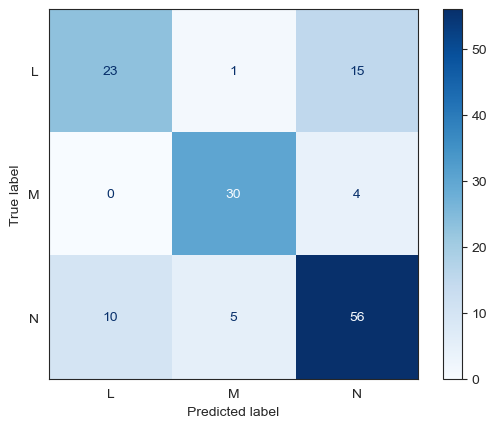

In [39]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print(classification_report(y_test, y_pred))
print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['L','M','N'])


Misclassified samples: 41
              precision    recall  f1-score   support

           H       0.65      0.62      0.63        39
           L       0.76      0.85      0.81        34
           M       0.72      0.70      0.71        71

    accuracy                           0.72       144
   macro avg       0.71      0.72      0.72       144
weighted avg       0.71      0.72      0.71       144


 Confusion Matrix : 
  [[24  1 14]
 [ 0 29  5]
 [13  8 50]]

 Confusion Matrix : 
  [[24  1 14]
 [ 0 29  5]
 [13  8 50]]


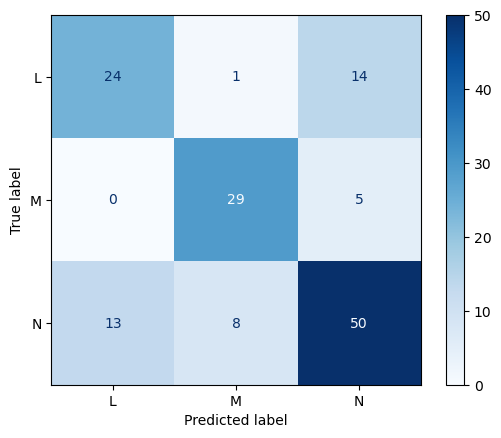

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print(classification_report(y_test, y_pred))
print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['L','M','N'])

Misclassified samples: 28
              precision    recall  f1-score   support

           H       0.82      0.69      0.75        39
           L       0.80      0.94      0.86        34
           M       0.80      0.80      0.80        71

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.80       144


 Confusion Matrix : 
  [[27  0 12]
 [ 0 32  2]
 [ 6  8 57]]


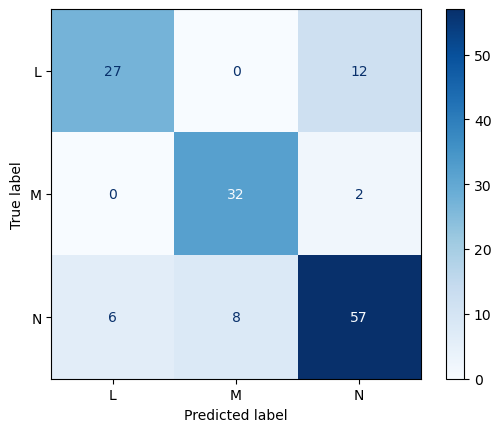

In [33]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print(classification_report(y_test, y_pred))
print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(RFC, X_test, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['L','M','N'])

In [42]:
from pickle import dump
#save the model
dump(RFC, open('RFC_class_mdl.pkl','wb'))

#save encoder
dump(encoder, open('enc_cls.pkl', 'wb'))

#save scaler
dump(scaler, open ('scal_cls.pkl', "wb"))

In [24]:
df.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class_encoded
raisedhands,1.000000,0.691572,0.643918,0.339386,-0.231016
VisITedResources,0.691572,1.000000,0.594500,0.243292,-0.161748
AnnouncementsView,0.643918,0.594500,1.000000,0.417290,-0.143996
Discussion,0.339386,0.243292,0.417290,1.000000,-0.121971
Class_encoded,-0.231016,-0.161748,-0.143996,-0.121971,1.000000
